In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from pickle import load

## Find all analysis files (change walk directory as needed)

## First, load all results into dictionary indexed by (scheme, njobs) tuple

In [2]:
with open("early_results.pickle", "rb") as f:
    all_results = load(f)

In [3]:
all_results

{('batch', 50): (5888, 20.32738723987911),
 ('batch', 100): (10918, 19.292163590432256),
 ('batch', 1000): (89595, 17.91004748625754),
 ('batch', 2000): (174722, 17.468026574000852),
 ('batch', 4000): (298876, 15.6222055669166),
 ('batch', 8000): (605058, 16.49915897398258),
 ('pertask', 50): (7583, 25.56344202176225),
 ('pertask', 100): (11819, 22.12989896045619),
 ('pertask', 1000): (95358, 18.680080194688674),
 ('pertask', 2000): (180362, 18.061389931010293),
 ('pertask', 4000): (301331, 15.923406737017679),
 ('pertask', 8000): (616263, 16.772698440695223),
 ('random', 50): (7232, 25.160797761597305),
 ('random', 100): (13624, 22.676935419055194),
 ('random', 1000): (94982, 18.947109225420114),
 ('random', 2000): (184273, 18.31711795834705),
 ('random', 4000): (305211, 16.104968161020995),
 ('random', 8000): (616396, 16.78006571547397),
 ('sparrrow', 50): (5810, 19.962479605499915),
 ('sparrrow', 100): (10342, 18.885025496408524),
 ('sparrrow', 1000): (90396, 18.209210494691966),
 (

In [4]:
all_y = []
all_ybars = []

schemes = ['random', 'pertask', 'batch', 'sparrrow']
njobs = [50, 100, 1000, 2000, 4000, 8000]

for scheme in schemes:
    my_y = []
    my_bars = []
    for njob in njobs:
        val, bar = all_results[(scheme, njob)]
        my_y.append(val / 1000)
        my_bars.append(bar)
    all_y.append(my_y)
    all_ybars.append(my_bars)
        

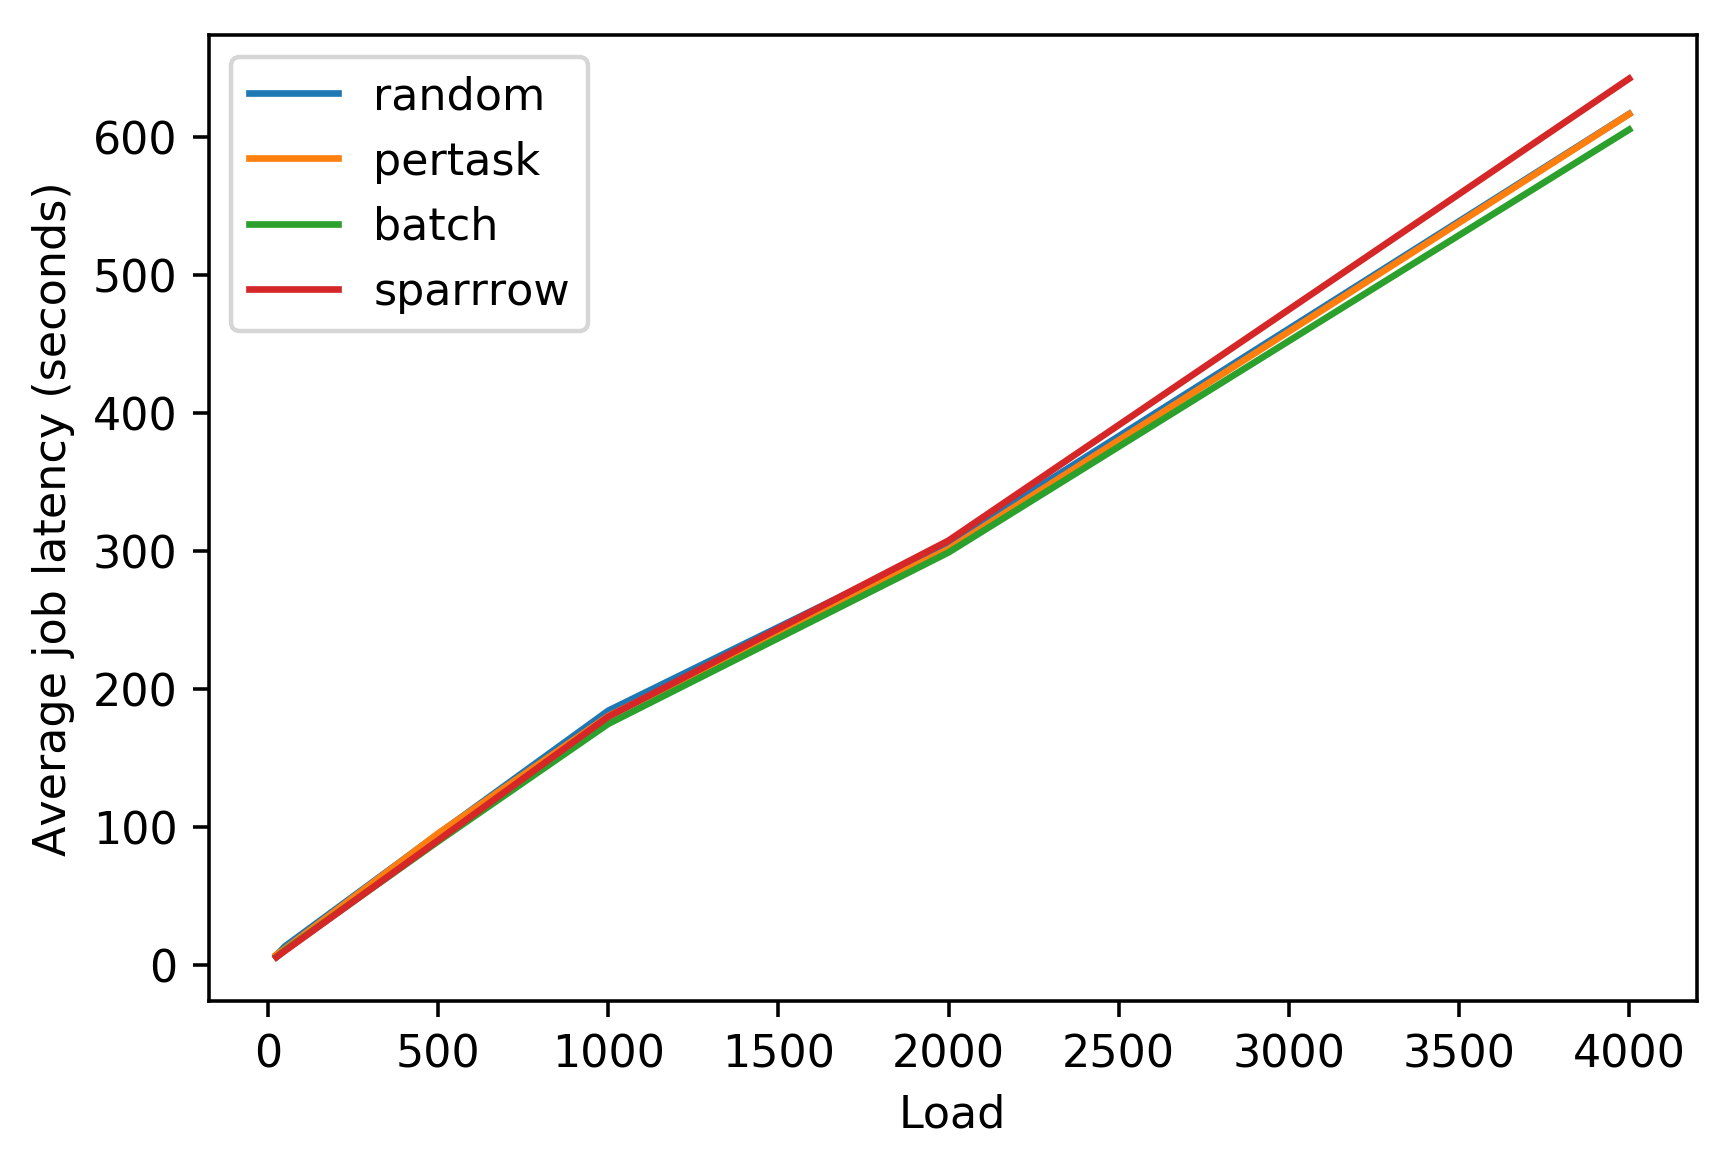

In [5]:
plt.figure(dpi=320)
for y in all_y:
    plt.plot([x / 2 for x in njobs], y)
    
plt.xlabel("Load")
plt.ylabel("Average job latency (seconds)")
plt.legend(schemes)
plt.show()

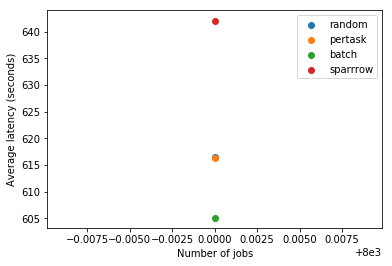

In [6]:

for y in all_y:
    plt.scatter(njobs[-1], y[-1])
    
plt.xlabel("Number of jobs")
plt.ylabel("Average latency (seconds)")
plt.legend(schemes)
plt.show()

## First trials run on Sunday using 2 tasks/job and uniform duration

In [7]:
loads = [.2, .4, .6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0, 4.0]
yvals = [
    [267, 271, 361, 312, 340, 390, 420, 428, 448, 466, 672, 798], #random 
    [352, 302, 459, 384, 315, 460, 429, 467, 449, 492, 631, 761], #pertask
    [354, 353, 354, 436, 608, 392, 574, 451, 535, 618, 721, 909], #batch
    [350, 366, 284, 379, 344, 376, 467, 424, 527, 502, 539, 605], #sparrow
]
errbars = [
    [1.625, 21.481, 11.361, 10.43, 10.208, 9.443, 8.125, 8.021, 6.586, 7.589, 5.534, 5.341], #same order as above
    [5.087, 15.303, 9.786, 9.381, 7.883, 8.193, 7.855, 7.882, 6.994, 7.317, 6.692, 5.346],
    [5.37, 18.567, 13.336, 11.097, 13.309, 8.279, 11.311, 8.521, 9.625, 9.972, 6.899, 7.261],
    [1.3, 6.438, 11.131, 5.624, 6.356, 8.279, 4.503, 5.434, 5.101, 4.942, 4.586, 4.303]
]


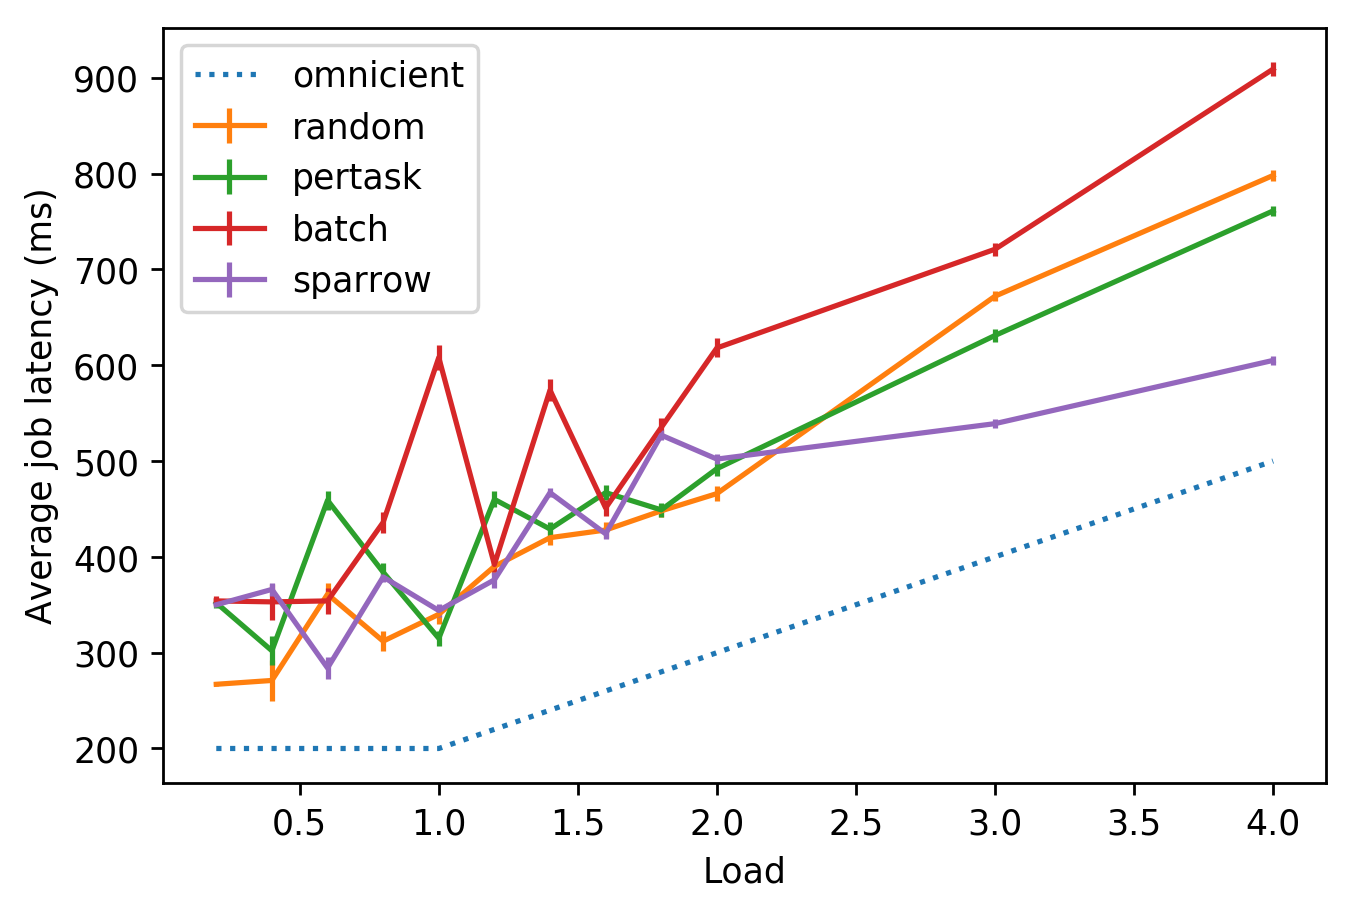

In [10]:
plt.figure(dpi=250)

omnicient = [np.max([(x-1) * 100 + 200, 200]) for x in loads]
plt.plot(loads, omnicient, linestyle=':')

for i in range(4):
    plt.errorbar(loads, yvals[i], yerr=errbars[i])
    
plt.xlabel("Load")
plt.ylabel("Average job latency (ms)")
plt.legend(['omnicient'] + schemes[0:-1] + ['sparrow'])
plt.show()

In [19]:
with open("testing_results_3rounds.pickle", "rb") as f:
    first3, njobs = load(f)

In [20]:
first3

{('batch', 1): (281, 8.764701934464172),
 ('batch', 2): (328, 5.569260872563492),
 ('batch', 3): (393, 4.909351117516624),
 ('batch', 4): (432, 4.194275198940151),
 ('batch', 5): (464, 3.990433003516731),
 ('batch', 6): (490, 3.5591648347593643),
 ('batch', 7): (489, 2.7763170762606544),
 ('batch', 8): (488, 2.8682166352398606),
 ('batch', 9): (564, 3.3815768109559574),
 ('batch', 10): (564, 3.061539191684833),
 ('batch', 15): (749, 2.5429447302752313),
 ('batch', 20): (933, 2.468722116579525),
 ('batch', 25): (1145, 2.409278361298715),
 ('batch', 30): (1271, 2.2138305035505814),
 ('batch', 35): (1425, 2.226433070018727),
 ('batch', 40): (1478, 2.1087872612168193),
 ('batch', 45): (1529, 2.041140513206487),
 ('batch', 50): (1662, 1.98639186868241),
 ('pertask', 1): (461, 15.558518567010164),
 ('pertask', 2): (389, 6.576473218982953),
 ('pertask', 3): (392, 4.4519381269756835),
 ('pertask', 4): (405, 3.121119813286393),
 ('pertask', 5): (402, 3.2195237743078295),
 ('pertask', 6): (465, 

In [21]:
all_y = []
all_ybars = []

schemes = ['random', 'pertask', 'batch', 'sparrrow']
njobs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for scheme in schemes:
    my_y = []
    my_bars = []
    for njob in njobs:
        val, bar = first3[(scheme, njob)]
        my_y.append(val / 1000)
        my_bars.append(bar)
    all_y.append(my_y)
    all_ybars.append(my_bars)
        

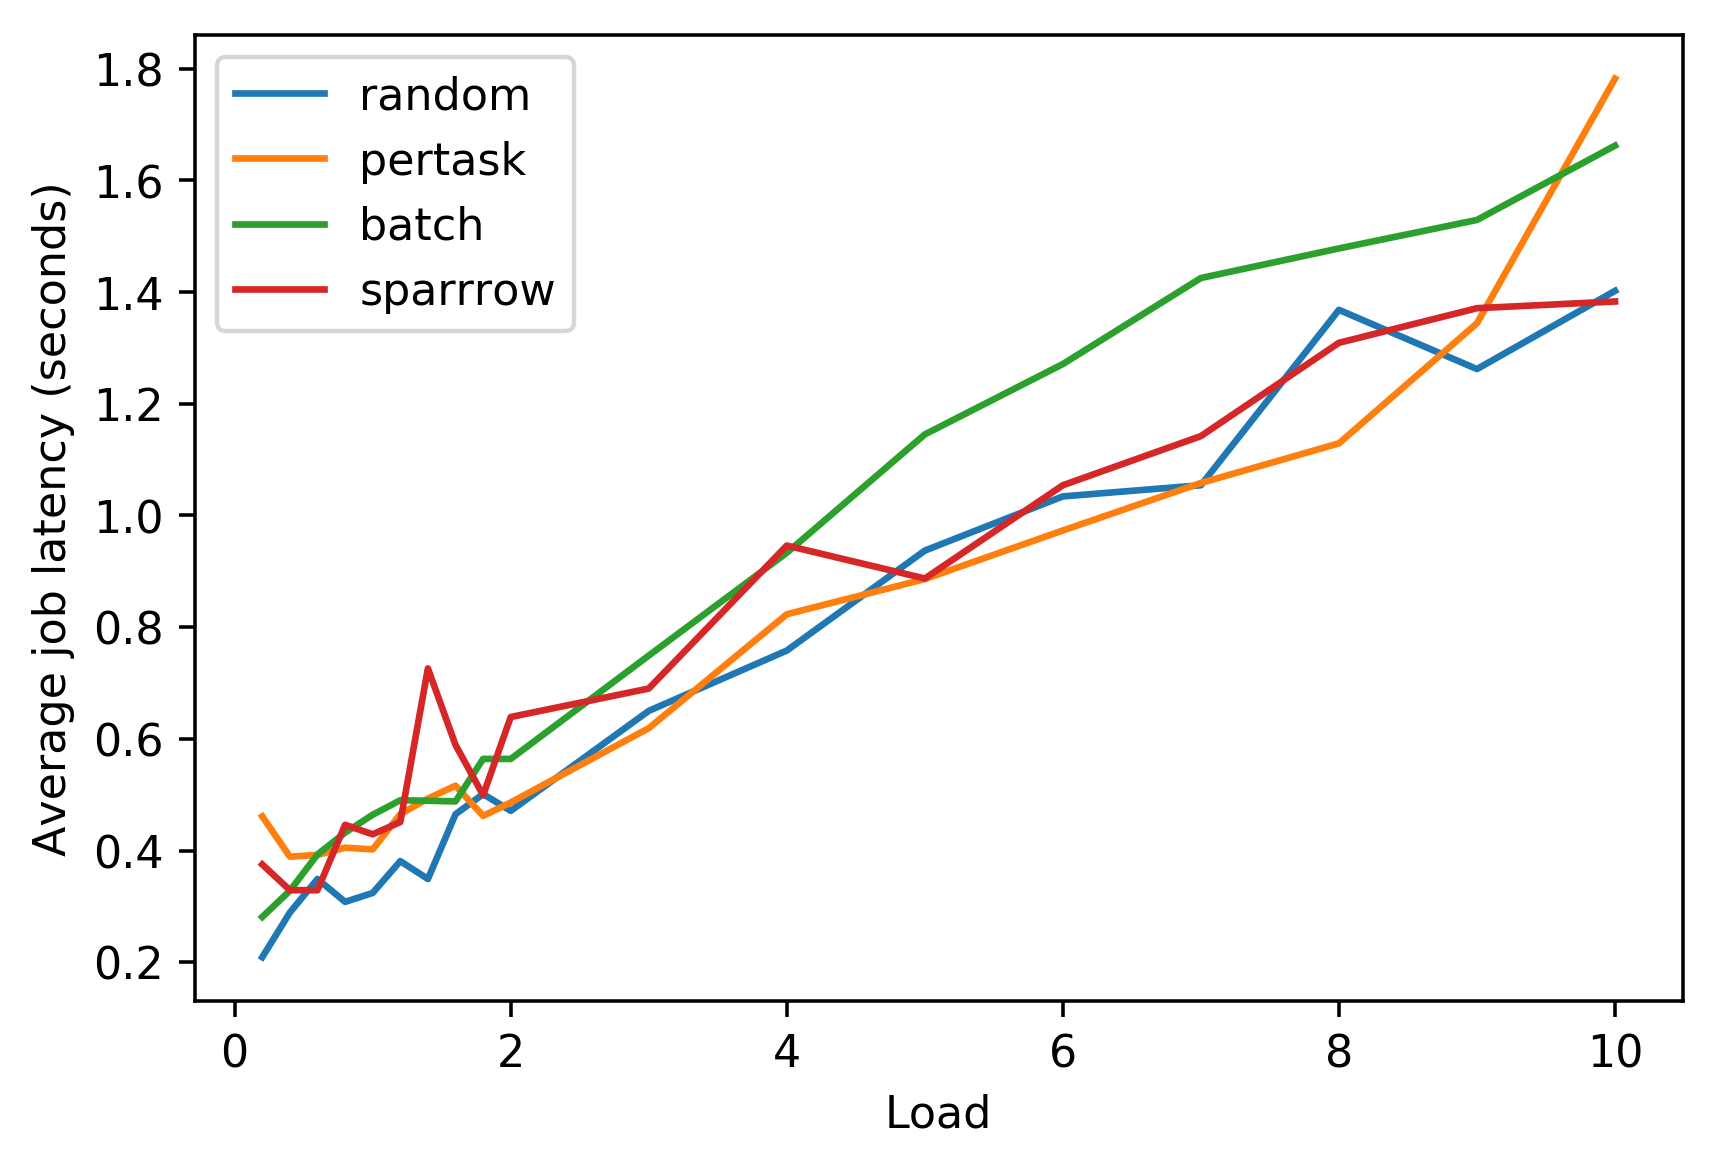

In [22]:
plt.figure(dpi=320)
for y in all_y:
    plt.plot([x * .2 for x in njobs], y)
    
plt.xlabel("Load")
plt.ylabel("Average job latency (seconds)")
plt.legend(schemes)
plt.show()